In [1]:
import yfinance
import pandas as pd 

# Download Data
Downloading prices data with yfinance.

In [2]:
stocks = yfinance.Ticker('AAPL')
prices = stocks.history(period='day', start='2017-01-01', end='2021-12-31')

In [3]:
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03,27.137811,27.262017,26.894086,27.219833,115127600,0.0,0.0
2017-01-04,27.149524,27.304197,27.126090,27.189363,84472400,0.0,0.0
2017-01-05,27.165936,27.386226,27.140157,27.327639,88774400,0.0,0.0
2017-01-06,27.367472,27.690878,27.294824,27.632290,127007600,0.0,0.0
2017-01-09,27.641662,27.988502,27.639320,27.885387,134247600,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-23,175.125322,176.121201,174.547711,175.553543,68356600,0.0,0.0
2021-12-27,176.360215,179.676494,176.340308,179.586868,74919600,0.0,0.0
2021-12-28,179.417557,180.582734,177.794270,178.551132,79144300,0.0,0.0


# Calculate Returns

### Daily Return
Calculate the daily return of the stock by current Close price / previous Close price - 1. We can simply use the pandas pct_change method to each of the daily return.

In [17]:
close = prices.Close
pct_change = close.pct_change().dropna()

In [18]:
pct_change

Date
2017-01-04   -0.001119
2017-01-05    0.005086
2017-01-06    0.011148
2017-01-09    0.009159
2017-01-10    0.001008
                ...   
2021-12-23    0.003644
2021-12-27    0.022975
2021-12-28   -0.005767
2021-12-29    0.000502
2021-12-30   -0.006578
Name: Close, Length: 1257, dtype: float64

To calculate the accumulative return of the stock when buying and selling the stock at close every trading day, (current return percentage + 1) * (previous return percentage + 1), and we can simply add 1 to the pct_change then use pandas prod method to get the total return for the whole data period. 

In [19]:
accumulative_return = (pct_change + 1).prod()

To calculate the price change or static return, which when buying and holding the stock, of the data period, last Close price / first Close price - 1

In [20]:
static_return = close.iloc[-1] / close.iloc[0] - 1

In [21]:
print(f'The stock have a static return of {static_return*100:.2f}% and a cumulative return of {accumulative_return*100:.2f}%.')

The stock have a static return of 551.97% and a cumulative return of 651.97%.


To calculate the volatility, we can simply use pandas std method.

In [22]:
volatility = pct_change.std()
print(f'The volatility of the stock is {volatility*100:.2f}%.')

The volatility of the stock is 1.92%.


Displaying the distribution of the range of the stock.

<AxesSubplot: >

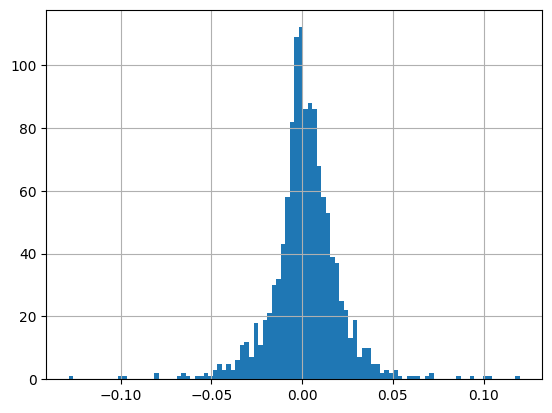

In [23]:
pct_change.hist(bins=100)

### Close to High Return
When the change the strategy instead of selling the stock at the next day Close price to selling the stock at it's next day High price.

In [24]:
close_to_high = (prices['High'].shift(-1) / prices['Close'] - 1).dropna()

In [25]:
close_to_high

Date
2017-01-03    0.003099
2017-01-04    0.007240
2017-01-05    0.013292
2017-01-06    0.012891
2017-01-09    0.003277
                ...   
2021-12-22    0.006889
2021-12-23    0.023485
2021-12-27    0.005545
2021-12-28    0.007474
2021-12-29    0.006634
Length: 1257, dtype: float64

The accumulative return 

In [26]:
h_accumulative_return = (close_to_high + 1).prod()

In [27]:
print(f'The stock has a normal cumulative return of {accumulative_return*100:.2f}% and a close to high cumulative return of {h_accumulative_return*100:.2f}%.')

The stock has a normal cumulative return of 651.97% and a close to high cumulative return of 94181760.27%.


Volatility and Distribution Graph

In [28]:
h_volatility = close_to_high.std()
print(f'The close to high strategy has a volatility of {h_volatility*100:.2f}%.')

The close to high strategy has a volatility of 1.51%.


<AxesSubplot: >

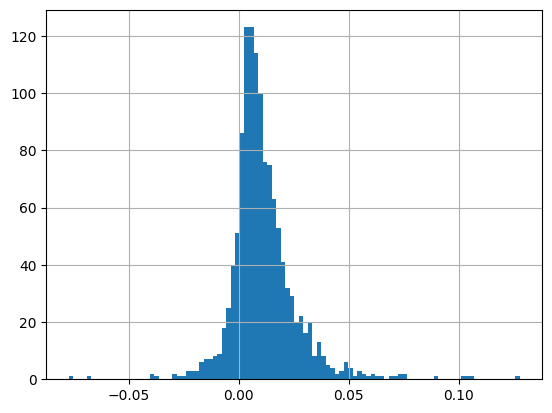

In [29]:
close_to_high.hist(bins=100)

The problem with this strategy is that we can not be sure to when is the high price of the stock going to be in the next day.

### Check Close to Low

In [35]:
close_to_low = (prices['Low'].shift(-1) / prices['Close'] - 1).dropna()

In [36]:
close_to_low

Date
2017-01-03   -0.003444
2017-01-04   -0.001810
2017-01-05   -0.001201
2017-01-06    0.000254
2017-01-09   -0.005799
                ...   
2021-12-22   -0.002107
2021-12-23    0.004482
2021-12-27   -0.009982
2021-12-28   -0.006414
2021-12-29   -0.007191
Length: 1257, dtype: float64

Volatility and Distribution Graph

In [37]:
l_volatility = close_to_low.std()
print(f'volatility: {l_volatility*100:.2f}%.')

volatility: 1.58%.


<AxesSubplot: >

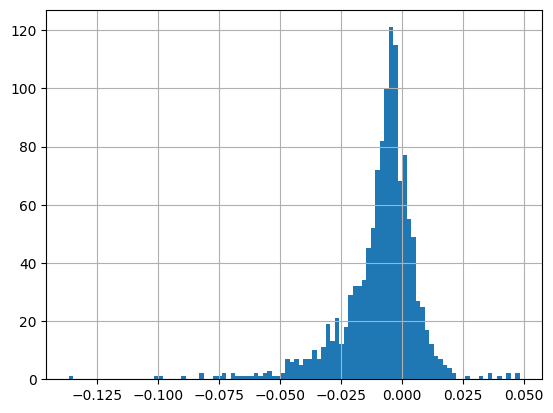

In [38]:
close_to_low.hist(bins=100)

If you look at the graph, you can see the range of when the stock is droping.